In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler
from sklearn import metrics, svm,linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
train_data = pd.read_csv("https://raw.githubusercontent.com/Samar89/Data/main/Loan%20Training%20Data.csv", delim_whitespace=False)
train_data.shape

(252000, 13)

In [ ]:
train_data.head(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
train_data.isnull().count()

Id                   252000
Income               252000
Age                  252000
Experience           252000
Married/Single       252000
House_Ownership      252000
Car_Ownership        252000
Profession           252000
CITY                 252000
STATE                252000
CURRENT_JOB_YRS      252000
CURRENT_HOUSE_YRS    252000
Risk_Flag            252000
dtype: int64

In [ ]:
train_data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [ ]:
#train_data.drop(['Id'],axis=1,inplace=True)

In [ ]:
print(train_data.shape)
#train_data.drop_duplicates(inplace=True,keep=False)
print(train_data.shape)

(252000, 13)
(252000, 13)


In [ ]:
train_data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


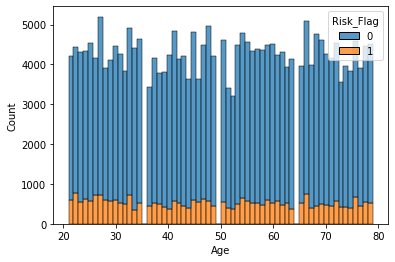

In [ ]:
sns.histplot(data=train_data, x="Age", hue="Risk_Flag", multiple="stack")
sns.set(rc = {'figure.figsize':(4,3)})

So this graph shows that the number of people that are Loan Defaulters are, on average, the same across all the ages.

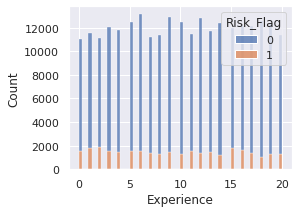

In [ ]:
sns.histplot(data=train_data, x="Experience", hue="Risk_Flag", multiple="stack")
sns.set(rc = {'figure.figsize':(5,5)})


We can say that the people in the experience band of 0-3 have a more probability of being a defaulter than in the band of 17-20

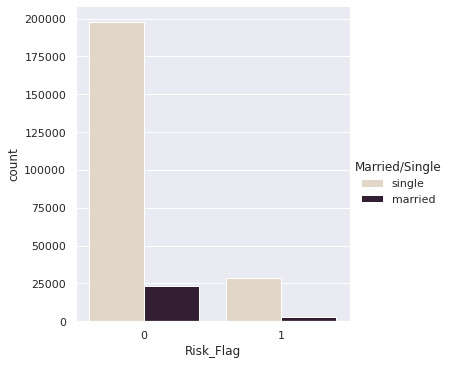

In [ ]:
sns.catplot(x="Risk_Flag", kind="count", palette="ch:.25", data=train_data, hue ="Married/Single")

This graph shows that, the loan defaulters are more single people than married people

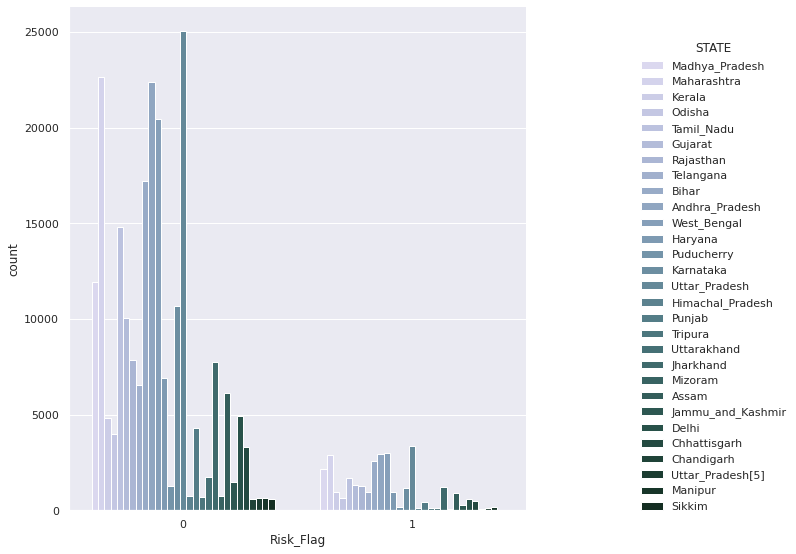

In [ ]:
sns.catplot(x="Risk_Flag", kind="count", palette="ch:125", data=train_data, hue ="STATE")
fig = plt.gcf()
fig.set_size_inches(12, 8)

This graph basically shows that some states like, Uttar Pradesh, Bihar, Andhra Pradesh, West Bengal and Maharashtra has the highest number of loan defaulters out of all the states
Also states like, Odisha, Puducherry, Himachal Pradesh, Punjab, Tripura, Uttrakhand, Mizoram, Uttar Pradesh[5], Manipur, Sikkim has the lowest number of loan defaulters.

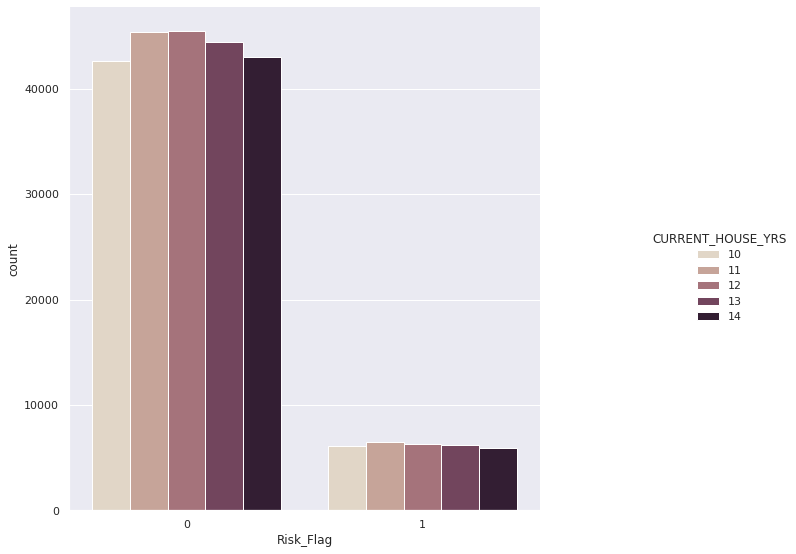

In [ ]:
sns.catplot(x="Risk_Flag", kind="count", palette="ch:.25", data=train_data, hue ="CURRENT_HOUSE_YRS")
fig = plt.gcf()
fig.set_size_inches(12, 8)

This graph shows that the number of defaulters are on average more or less the same and doesn't really depend on the current years in the house

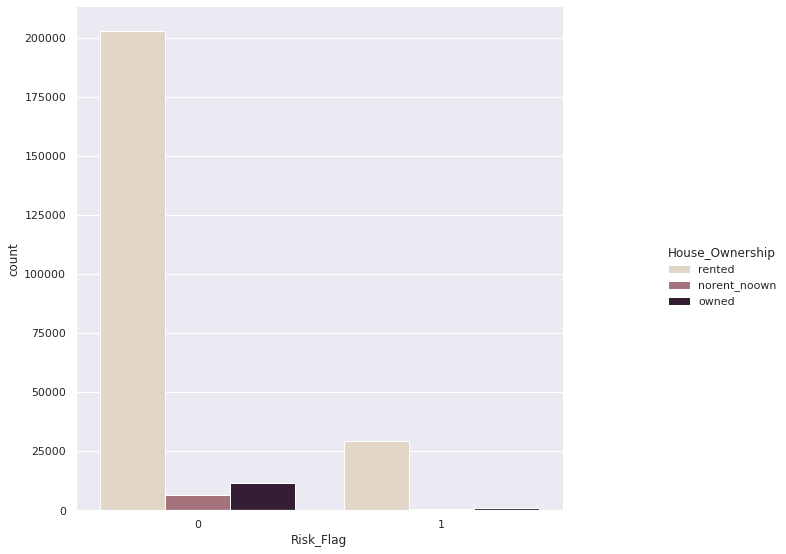

In [ ]:
sns.catplot(x="Risk_Flag", kind="count", palette="ch:.25", data=train_data, hue ="House_Ownership")
fig = plt.gcf()
fig.set_size_inches(12, 8)

This shows that the loan defaulters are mostly those people who have a rented house.
The number of people who're loan defaulters with their owned property and who doesn't own a house or who doesn't even have a rented one is negligible.

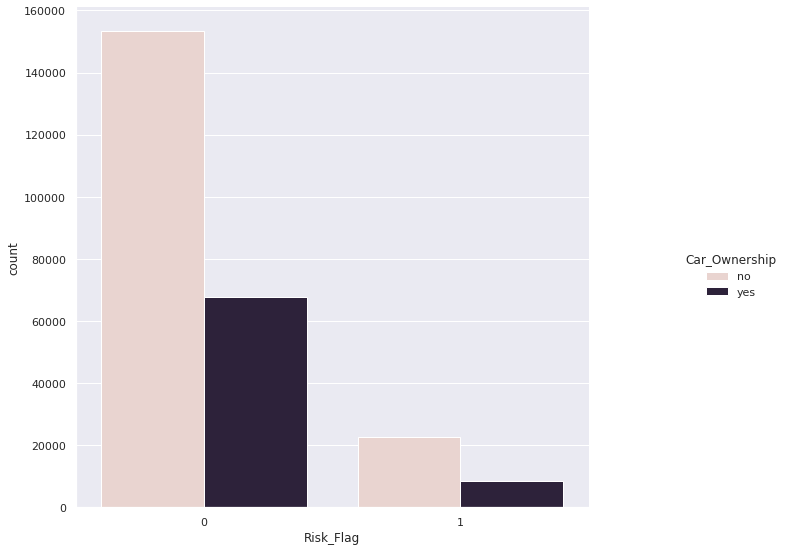

In [ ]:
sns.catplot(x="Risk_Flag", kind="count", palette="ch:525", data=train_data, hue ="Car_Ownership")
fig = plt.gcf()
fig.set_size_inches(12, 8)

The number of loan defaulters are more, who doesn't own a car than the people who own a car.

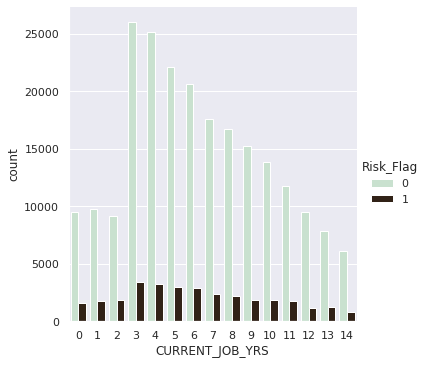

In [ ]:
sns.catplot(x="CURRENT_JOB_YRS", kind="count", palette="ch:256", data=train_data,hue="Risk_Flag")

These two graphs shows that as the job experience increase from 0 to 3 the loan defaulters increase but from 3 to 14 as the experience increase the number of defaulters saw a sudden increase but deacreases continuously as we move further.

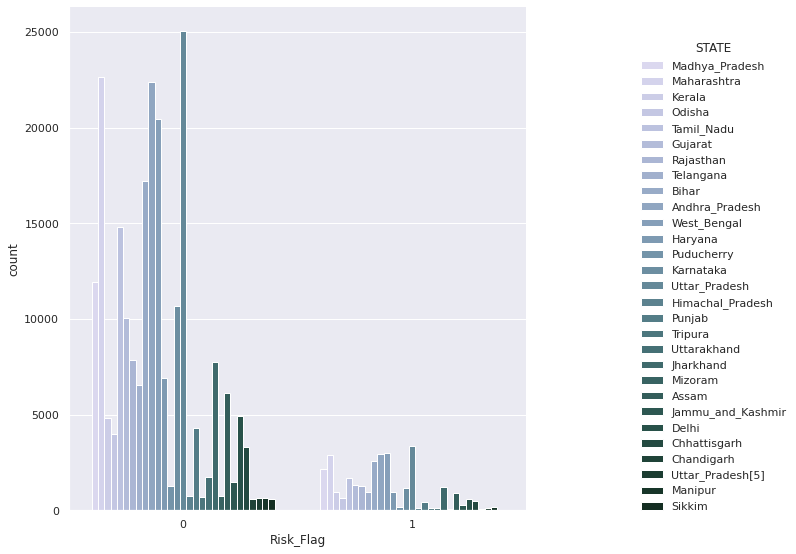

In [ ]:
sns.catplot(x="Risk_Flag", kind="count", palette="ch:125", data=train_data, hue ="STATE")
fig = plt.gcf()
fig.set_size_inches(12, 8)

In [ ]:
train_data.Risk_Flag.value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

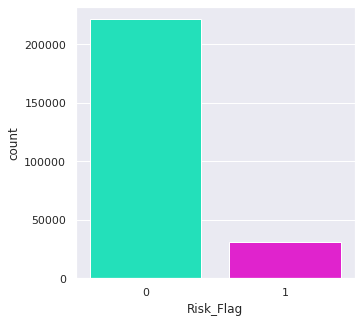

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Risk_Flag',data=train_data,palette =['#04FFCD','#FF04E6'])
plt.show()

# imbalanced dataset :(

In [ ]:
train_data.head(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder(categorical_features=[0])
#data["Profession"] = onehotencoder.fit_transform(data["Profession"]).toarray()
#data["CITY"] = onehotencoder.fit_transform(data["CITY"]).toarray()
#data["STATE"] = onehotencoder.fit_transform(data["STATE"]).toarray()
#########################################################
#from sklearn.compose import ColumnTransformer
#ct = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
#data["Profession"] = np.array(ct.fit_transform(data["Profession"]), dtype=np.float)
#########################################################
#from sklearn.preprocessing import LabelBinarizer

#jobs_encoder = LabelBinarizer()
#jobs_encoder.fit(data['Profession'])
#transformed = jobs_encoder.transform(data['Profession'])
#ohe_df = pd.DataFrame(transformed)
#data = pd.concat([data, ohe_df], axis=1).drop(['Profession'], axis=1)


#########################################################
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data["Married/Single"] = label_encoder.fit_transform(train_data["Married/Single"])
train_data["House_Ownership"] = label_encoder.fit_transform(train_data["House_Ownership"])
train_data["Car_Ownership"] = label_encoder.fit_transform(train_data["Car_Ownership"])
train_data["Profession"] = label_encoder.fit_transform(train_data["Profession"])
train_data["CITY"] = label_encoder.fit_transform(train_data["CITY"])
train_data["STATE"] = label_encoder.fit_transform(train_data["STATE"])
train_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,0,33,251,13,3,13,0
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1


In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(drop='first')
#train_data["House_Ownership"] = enc.fit_transform(train_data["House_Ownership"]).toarray()


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Id                 252000 non-null  int64
 1   Income             252000 non-null  int64
 2   Age                252000 non-null  int64
 3   Experience         252000 non-null  int64
 4   Married/Single     252000 non-null  int64
 5   House_Ownership    252000 non-null  int64
 6   Car_Ownership      252000 non-null  int64
 7   Profession         252000 non-null  int64
 8   CITY               252000 non-null  int64
 9   STATE              252000 non-null  int64
 10  CURRENT_JOB_YRS    252000 non-null  int64
 11  CURRENT_HOUSE_YRS  252000 non-null  int64
 12  Risk_Flag          252000 non-null  int64
dtypes: int64(13)
memory usage: 25.0 MB


Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')


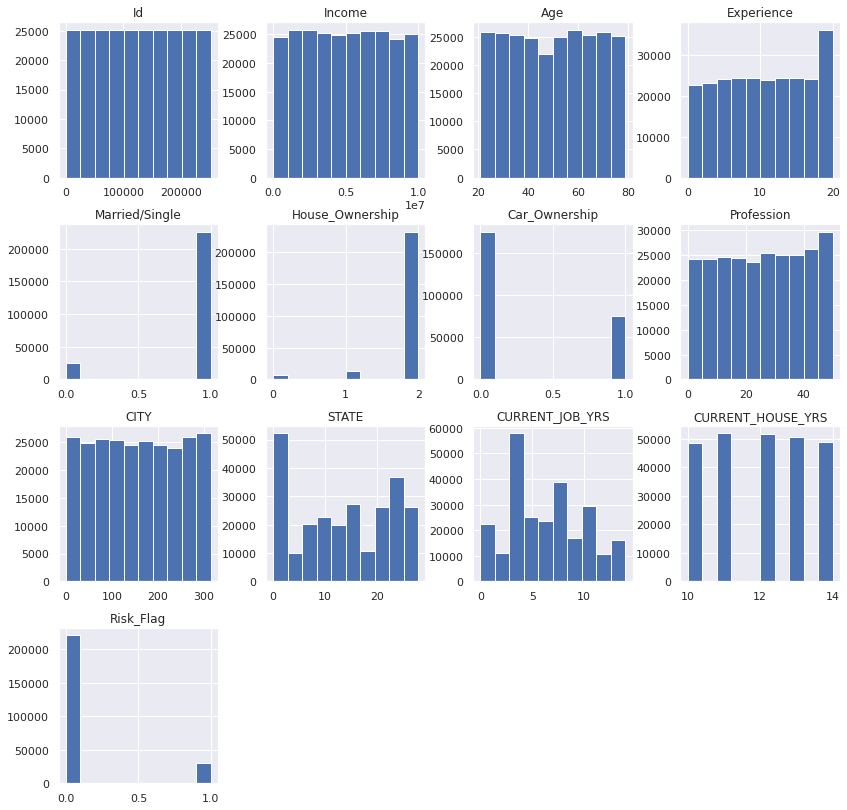

In [ ]:
numerical = train_data.select_dtypes(include = ["int64"]).keys()
print(numerical)
train_data[numerical].hist(figsize=(14,14))
plt.show()

In [ ]:
train_data.corrwith(train_data['Risk_Flag'])

Id                   0.032153
Income              -0.003091
Age                 -0.021809
Experience          -0.034523
Married/Single       0.021092
House_Ownership      0.023622
Car_Ownership       -0.024036
Profession          -0.004900
CITY                 0.004575
STATE               -0.003401
CURRENT_JOB_YRS     -0.016942
CURRENT_HOUSE_YRS   -0.004375
Risk_Flag            1.000000
dtype: float64

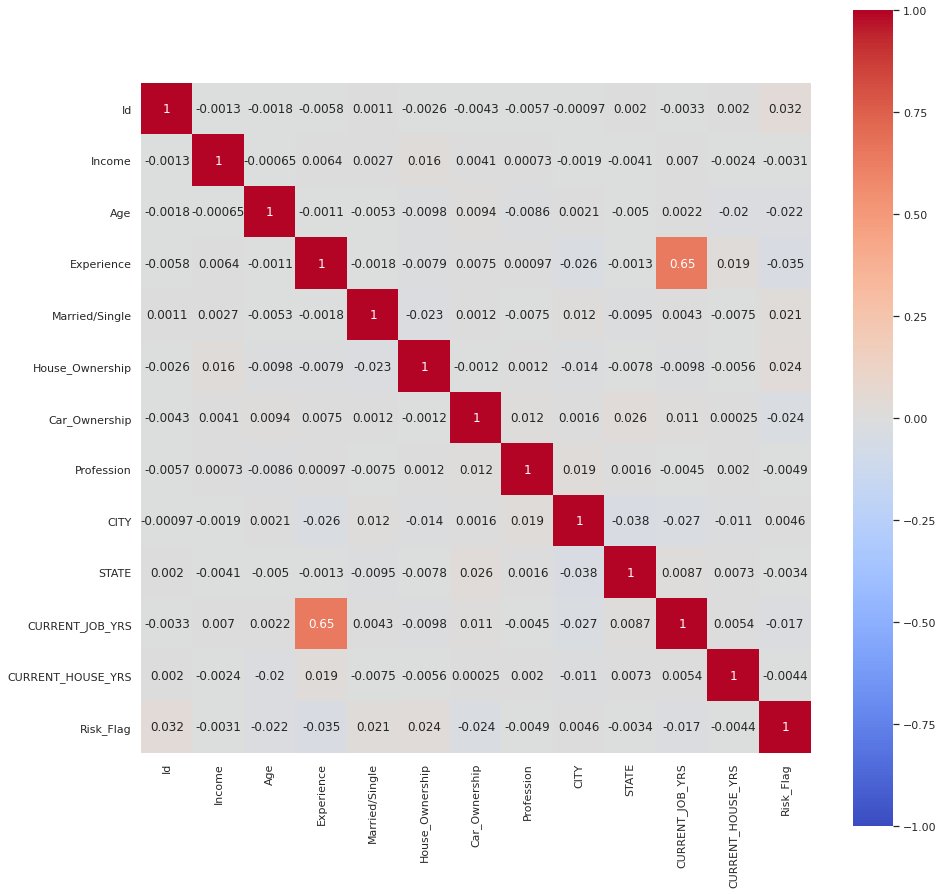

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

In [ ]:
#plt.figure(figsize=(20,20))
#sns.pairplot(train_data, diag_kind="kde", hue="Risk_Flag", kind="scatter", palette="Set1")
#plt.show()

## Task 1 : **Classification**

In [ ]:
#Experience	Married/Single	House_Ownership	Car_Ownership	Profession	CITY	STATE	CURRENT_JOB_YRS	CURRENT_HOUSE_YRS	
X = train_data[['Experience','Married/Single','House_Ownership','Car_Ownership','STATE','CURRENT_JOB_YRS']]
y = train_data['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train , y_train = smt.fit_resample(X_train , y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# 1. Logistic **Regression**

In [ ]:
#Import Libraries
from sklearn.preprocessing import MinMaxScaler
#MinMaxScaler for Data

scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)


In [ ]:
X_train

array([[0.45      , 1.        , 1.        , 0.        , 0.21428571,
        0.64285714],
       [1.        , 1.        , 1.        , 0.        , 0.21428571,
        0.5       ],
       [0.3       , 1.        , 1.        , 0.        , 0.39285714,
        0.35714286],
       ...,
       [0.1       , 1.        , 1.        , 0.        , 0.        ,
        0.14285714],
       [0.95      , 1.        , 1.        , 0.        , 0.71428571,
        0.92857143],
       [0.05      , 1.        , 1.        , 0.        , 0.32142857,
        0.07142857]])

In [ ]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
#----------------------------------------------------
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=42,max_iter=100)
LogisticRegressionModel.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train)) #0.5339269877468281

LogisticRegressionModel Train Score is :  0.5337131173249053


In [ ]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X_test = scaler.fit_transform(X_test)

In [ ]:
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test)) #0.5221904761904762

LogisticRegressionModel Test Score is :  0.5229206349206349


In [ ]:
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)

LogisticRegressionModel No. of iteratios is :  [32]


In [ ]:
y_pred = LogisticRegressionModel.predict(X_test)

Confusion Matrix is : 
 [[28784 26424]
 [ 3632  4160]]


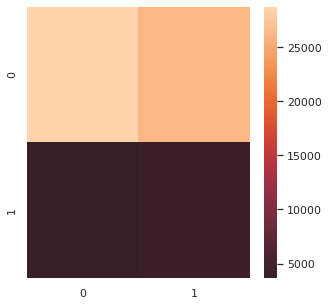

In [ ]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()


In [ ]:
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=True)
print('Accuracy Score is : ', AccScore)


Accuracy Score is :  0.5229206349206349


In [ ]:
#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2  
RecallScore = recall_score(y_test, y_pred, average='micro')
print('Recall Score is : ', RecallScore)


Recall Score is :  0.5229206349206349


In [ ]:
#Calculating Precision Score : (Specificity) #(TP / float(TP + FP)) 
PrecisionScore = precision_score(y_test, y_pred, average='micro')
print('Precision Score is : ', PrecisionScore)

Precision Score is :  0.5229206349206349


## Logistic Regression Implementation from scratch

In [ ]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def loss(features, target, weights):
    scores = np.dot(features,weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def logistic_regression( X, target, iteration, alpha):   
    intercept = np.ones((X.shape[0], 1))
    X = np.hstack((intercept, X))       
    weights = np.zeros(X.shape[1])
    losses=[]
    for i in range(iteration):
        scores = np.dot(X, weights) 
        h = 1 / (1 + np.exp(-scores))       
        gradient = np.dot(X.T, (target - h))
        weights += alpha * gradient
        
        l = loss(X, h, weights) 
        losses.append(l)
        
    return weights,losses

In [ ]:
# with alpha 0.0001
weights, losses = logistic_regression(X_train, y_train, 100, 0.0001)
features = np.hstack((np.ones((X_test.shape[0], 1)),X_test))
final_scores = np.dot(features, weights)
preds = np.round(sigmoid(final_scores))
Accuracy = ((preds == y_test).sum().astype(float) / len(preds))
print ('Test Accuracy : ',Accuracy)

Test Accuracy :  0.14285714285714285


In [ ]:
# with alpha 0.0000001
weights, losses = logistic_regression(X_train, y_train, 100, 0.0000001)
features = np.hstack((np.ones((X_test.shape[0], 1)),X_test))
final_scores = np.dot(features, weights)
preds = np.round(sigmoid(final_scores))
Accuracy = ((preds == y_test).sum().astype(float) / len(preds))
print ('Test Accuracy : ',Accuracy)

Test Accuracy :  0.48917460317460315


In [ ]:
# with alpha 0.0000000001
weights, losses = logistic_regression(X_train, y_train, 100, 0.000000001)
features = np.hstack((np.ones((X_test.shape[0], 1)),X_test))
final_scores = np.dot(features, weights)
preds = np.round(sigmoid(final_scores))
Accuracy = ((preds == y_test).sum().astype(float) / len(preds))
print ('Test Accuracy : ',Accuracy)

Test Accuracy :  0.5846984126984127


# 2. SVM

In [ ]:
clf = SVC(kernel = 'rbf')
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
score = clf.score(X_test, y_test)
print("Accuracy :",score)

In [ ]:
print(classification_report(y_test,predictions))

# 3.KNN classifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Train Score is : ' , clf.score(X_train, y_train))
print('Test Score is : ' , clf.score(X_test, y_test))

CM = confusion_matrix(y_test, predictions)
print('Confusion Matrix is : \n', CM)

sns.heatmap(CM, center = True)
plt.show()

## Decision trees

Train Score is :  0.5977798016839972
Test Score is :  0.587952380952381
Confusion Matrix is : 
 [[32508 22700]
 [ 3259  4533]]


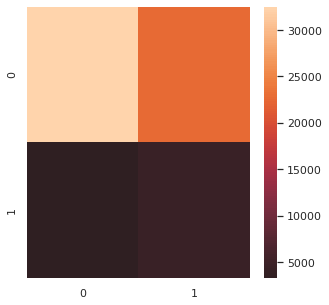

In [ ]:
# with max depth = 9
clf = DecisionTreeClassifier(max_depth=9)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Train Score is : ' , clf.score(X_train, y_train))
print('Test Score is : ' , clf.score(X_test, y_test))

CM = confusion_matrix(y_test, predictions)
print('Confusion Matrix is : \n', CM)

sns.heatmap(CM, center = True)
plt.show()

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.59      0.71     55208
           1       0.17      0.58      0.26      7792

    accuracy                           0.59     63000
   macro avg       0.54      0.59      0.49     63000
weighted avg       0.82      0.59      0.66     63000



Train Score is :  0.7920848512629979
Test Score is :  0.7119682539682539
Confusion Matrix is : 
 [[38584 16624]
 [ 1522  6270]]


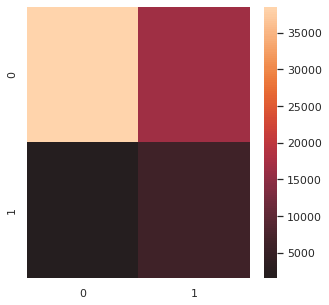

In [ ]:
# with max depth = 9
clf = DecisionTreeClassifier(max_depth=25)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Train Score is : ' , clf.score(X_train, y_train))
print('Test Score is : ' , clf.score(X_test, y_test))

CM = confusion_matrix(y_test, predictions)
print('Confusion Matrix is : \n', CM)

sns.heatmap(CM, center = True)
plt.show()

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     55208
           1       0.27      0.80      0.41      7792

    accuracy                           0.71     63000
   macro avg       0.62      0.75      0.61     63000
weighted avg       0.88      0.71      0.76     63000



# Task 2 --> Regression Analysis

## Linear regression

In [ ]:
y = train_data['Income']
X = train_data['Experience']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=1)

In [ ]:
X_train = np.array(X_train).reshape((-1,1))
X_test = np.array(X_test).reshape((-1,1))

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [ ]:
print('Train score :' ,regr.score(X_train, y_train))
print('Test score :' ,regr.score(X_test, y_test))

Train score : 4.8846731991458725e-06
Test score : 4.943267781654104e-05


## Multiple regression

In [ ]:
y = train_data['Income']
X = train_data[['Age','Experience','Married/Single','House_Ownership','Car_Ownership','Profession']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
close_predictions = lr.predict(X_test)   

print("Train score :",lr.score(X_test, y_test))
print("Test score :",lr.score(X_train, y_train))

Train score : 0.00019430053851943188
Test score : 0.00037353947013918365


## SVR regression

In [ ]:
y = train_data['Income']
X = train_data['Experience']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)
X_train = np.array(X_train).reshape((-1,1))
X_test = np.array(X_test).reshape((-1,1))

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
regr =SVR(C=1.0, epsilon=0.2)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE : {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE : {mae} ')

## Polynomial regression

In [ ]:
y = train_data['Income']
X = train_data['Experience']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)
X_train = np.array(X_train).reshape((-1,1))
X_test = np.array(X_test).reshape((-1,1))

In [ ]:
polynomial_features= PolynomialFeatures(degree=4)

x_poly = polynomial_features.fit_transform(X_train)
x_test_poly = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_test_poly)

rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
mse = mean_squared_error(y_test,y_poly_pred)
r2 = r2_score(y_test,y_poly_pred)
print('RMSE : ', rmse)
print('MSE :',mse)
print('R2 : ',r2)

RMSE :  2869814.0083544706
MSE : 8235832442547.553
R2 :  0.00011324952841040847


## 1. Implementation of LR

In [ ]:
def GD(x,y,alpha,iteration):
    
    m=len(x)
    theta_0=0
    theta_1=0
    theta0_list=[]
    theta1_list=[]
    cost_func=0
    loss_list=[]
    y_predict=[]
    hypothesis=[]
    
    for i in range(iteration):
        y_predict = theta_0 + theta_1*x
        hypothesis.append(y_predict)
        
        cost_func=(1/(2*m))*sum((y_predict-y)**2)
        loss_list.append(cost_func)
        
        G0 =(1/m)*sum(y_predict-y)
        G1 =(1/m)*sum((y_predict-y)*x)
        
        theta_0=theta_0-alpha*G0
        theta0_list.append(theta_0)
        
        theta_1=theta_1-alpha*G1
        theta1_list.append(theta_1)
        
    return theta0_list, theta1_list, loss_list, hypothesis, theta_0, theta_1

In [ ]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1=GD(X_train,y_train,0.001,100)

In [ ]:
Y_predicted_final = theta_0 + theta_1 * X_test
y_mean = np.mean(y_test)

SStot = np.sum((y_test - y_mean)**2)
SSres = np.sum((y_test - Y_predicted_final)**2)

R2 = 1 - (SSres / SStot)
print("R2 = ",R2)